# Setup

In [1]:
from functools import partial
from collections import namedtuple

import matplotlib.pyplot as plt
import mplcursors as mpc
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib.colors import LinearSegmentedColormap


%matplotlib widget
#plt.style.use('ggplot')


# Linear Regression

In [2]:
# Define a named tuple called 'Point'
Point = namedtuple('Point', ['x', 'y'])

In [3]:
class InteractiveLinearRegression:
    def __init__(self, points=[]):
        self.model = LinearRegression()
        self.points = points
        fig, ax = plt.subplots(figsize=(7, 7))
        self.fig = fig
        self.ax = ax
        self.fig.canvas.mpl_connect('button_press_event', partial(self.__class__.onclick, self))
        self.__clear_ax()
        if self.points:
            self.__update_model()
            self.redraw()
        

    def __update_model(self):
        self.model.fit(
            np.array([p.x for p in self.points]).reshape(-1,1),
            np.array([p.y for p in self.points]).reshape(-1,1),
        )
    
    def __clear_ax(self):
        self.ax.clear()
        self.ax.set_xlim(0, 100)
        self.ax.set_ylim(0, 100)

    def __plot_points(self):
        self.ax.plot([p.x for p in self.points], [p.y for p in self.points], 'ro')  # 'ro' specifies a red circle marker

    def __plot_line(self):
        self.ax.plot([0, 100], self.model.predict([[0], [100]]))

    def redraw(self):
        self.__clear_ax()
        self.__plot_points()
        self.__plot_line()
        plt.show()
                
    def add_point(self, point):
        self.points.append(point)
        self.__update_model()

    def onclick(self, event):
        # Update the plot with the new point
        if event.button == 1:  # Left mouse button (1) clicked
            self.add_point(Point(event.xdata, event.ydata))
            self.redraw()

    def cleanup(self):
        plt.close(self.fig)



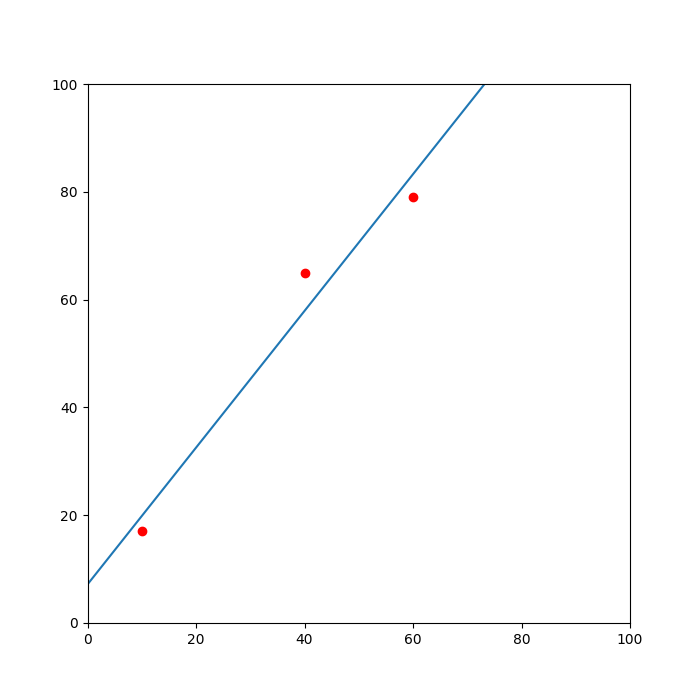

In [4]:
interactive_linear_regression = InteractiveLinearRegression(points=[Point(10,17), Point (40, 65), Point(60, 79)])

In [5]:
interactive_linear_regression.cleanup()
del interactive_linear_regression

In [6]:
del Point

# Logistic Regression

In [7]:
# Define a named tuple called 'Point'
Point = namedtuple('Point', ['x1', 'x2', 'y']) #  y can only be 0 or 1

In [8]:
class InteractiveLogisticRegression:
    def __init__(self, points=[]):
        self.model = LogisticRegression()
        self.points = points
        
        # 2d plot
        fig, ax = plt.subplots(figsize=(7, 7))
        self.fig2d = fig
        self.ax2d = ax
        self.fig2d.canvas.mpl_connect('button_press_event', partial(self.__class__.onclick, self))
        
        # 3d plot
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        self.fig3d = fig
        self.ax3d = ax
        
        self.__clear_ax()
        if self.points:
            self.__update_model()
            self.redraw()
        
    
    def __has_two_classes(self):
        return [p for p in self.points if p.y==0] and [p for p in self.points if p.y==1]

    def __update_model(self):
        if self.__has_two_classes():
            self.model.fit(
                np.array([[p.x1, p.x2] for p in self.points]),
                np.array([p.y for p in self.points]),
            )
    
    def __clear_ax(self):
        # 2d plot
        self.ax2d.clear()
        self.ax2d.set_xlim(0, 100)
        self.ax2d.set_ylim(0, 100)
        self.ax2d.set_xlabel("x1")
        self.ax2d.set_ylabel("x2")

        # 3d plot
        self.ax3d.clear()
        self.ax3d.set_xlim(0, 100)
        self.ax3d.set_ylim(0, 100)
        self.ax3d.set_zlim(0, 1)
        self.ax3d.set_xlabel("x1")
        self.ax3d.set_ylabel("x2")
        self.ax3d.set_zlabel("P(Y=1|(X1=x1,X2=x2))")
        

    def __plot_points(self):
        self.ax2d.plot([p.x1 for p in self.points if p.y==1], 
                       [p.x2 for p in self.points if p.y==1], 
                       'bo')  # 'bo' specifies a blue circle marker
        self.ax2d.plot([p.x1 for p in self.points if p.y==0], 
                       [p.x2 for p in self.points if p.y==0], 
                       'ko')  # 'ko' specifies a black circle marker

    def __plot_probability(self):
        if self.__has_two_classes():
            xx, yy = np.meshgrid(np.arange(0, 100.1, 0.2), np.arange(0, 100.1, 0.2))
            
            pairs = np.column_stack((xx.ravel(), yy.ravel()))
            
            zz = np.array([r[1] for r in self.model.predict_proba(pairs)]).reshape(xx.shape)

            # self.ax3d.plot_surface(xx, yy, np.full_like(xx, 0.5))
            self.ax3d.plot_surface(xx, yy, zz, cmap=LinearSegmentedColormap.from_list('custom', ['black', 'white', 'blue']))
            
    def redraw(self):
        self.__clear_ax()
        self.__plot_points()
        self.__plot_probability()
        plt.show()
                
    def add_point(self, point):
        self.points.append(point)
        self.__update_model()

    def onclick(self, event):
        # Update the plot with the new point
        if event.button == 1:  # Left mouse button (1) clicked
            self.add_point(Point(event.xdata, event.ydata, 1)) 
        # Update the plot with the new point
        if event.button == 3:  # Right mouse button (3) clicked
            self.add_point(Point(event.xdata, event.ydata, 0))
        self.redraw()

    def cleanup(self):
        plt.close(self.fig2d)
        plt.close(self.fig3d)


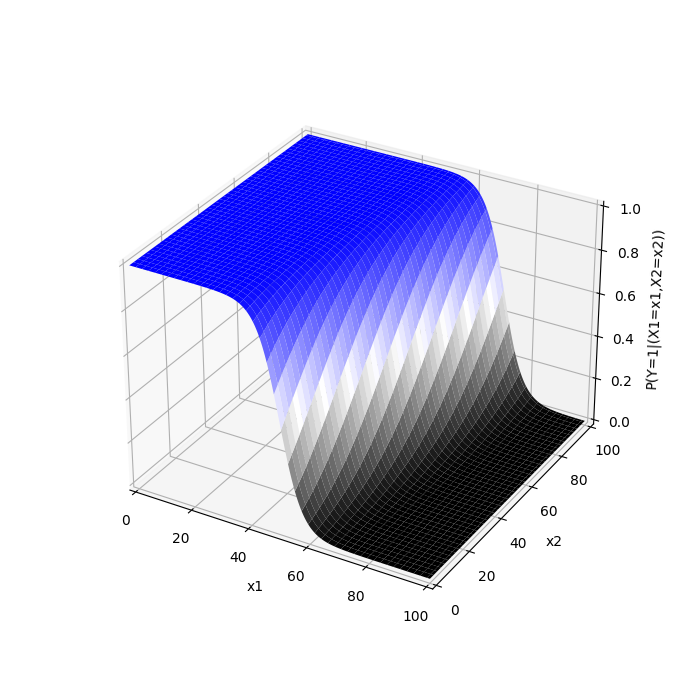

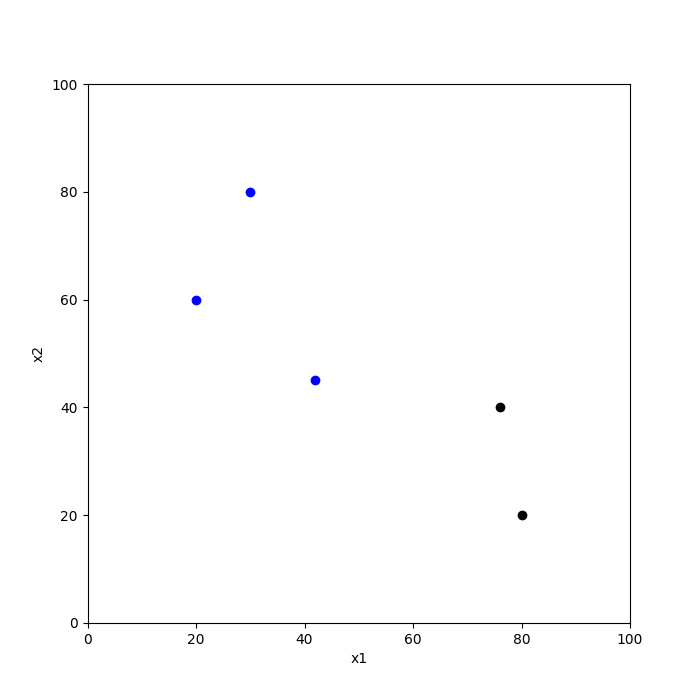

In [9]:
interactive_logistic_regression = InteractiveLogisticRegression(points=[Point(30, 80, 1), Point(20, 60, 1), Point(42, 45, 1), Point(80, 20, 0), Point(76, 40, 0)])

In [10]:
interactive_logistic_regression.cleanup()
del interactive_logistic_regression

In [11]:
del Point